### Referencia: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/

In [28]:
install.packages(c("FactoMineR","factoextra"))


The downloaded binary packages are in
	/var/folders/05/nyrh4fgd37j0cwv9czt39c700000gn/T//RtmpqidFDY/downloaded_packages


In [29]:
library("FactoMineR")
library("factoextra")

In [30]:
data(poison)

In [31]:
head(poison,3)

Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [32]:
dim(poison)

[1] 55 15

In [33]:
paises = read.csv("EjemploPaises.csv")

In [34]:
head(paises,10)

Country,V22
FR-France,Agree strongly
FR-France,Agree
FR-France,Agree strongly
FR-France,Neither agree nor disagree
FR-France,Agree
FR-France,Agree
FR-France,Agree strongly
FR-France,Agree
FR-France,Agree strongly
FR-France,Neither agree nor disagree


In [47]:
install.packages("data.table")
install.packages("mltools")


The downloaded binary packages are in
	/var/folders/05/nyrh4fgd37j0cwv9czt39c700000gn/T//RtmpqidFDY/downloaded_packages

The downloaded binary packages are in
	/var/folders/05/nyrh4fgd37j0cwv9czt39c700000gn/T//RtmpqidFDY/downloaded_packages


In [50]:
library(data.table)
library(mltools)
pa <- one_hot(as.data.table(paises[,2]))

In [51]:
head(pa)

V1_Agree,V1_Agree strongly,V1_Can't choose,V1_Disagree,V1_Disagree strongly,V1_Neither agree nor disagree,V1_No answer
0,1,0,0,0,0,0
1,0,0,0,0,0,0
0,1,0,0,0,0,0
0,0,0,0,0,1,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0


In [55]:
paises = cbind(paises[,1],pa)

## I decide what are my columns for active variables (I remove the diagnosis, age and time)

In [56]:
length(paises)

[1] 8

In [57]:
head(paises)

V1,V1_Agree,V1_Agree strongly,V1_Can't choose,V1_Disagree,V1_Disagree strongly,V1_Neither agree nor disagree,V1_No answer
FR-France,0,1,0,0,0,0,0
FR-France,1,0,0,0,0,0,0
FR-France,0,1,0,0,0,0,0
FR-France,0,0,0,0,0,1,0
FR-France,1,0,0,0,0,0,0
FR-France,1,0,0,0,0,0,0


In [58]:
paises.active <- paises[,2:8]
head(paises.active)

V1_Agree,V1_Agree strongly,V1_Can't choose,V1_Disagree,V1_Disagree strongly,V1_Neither agree nor disagree,V1_No answer
0,1,0,0,0,0,0
1,0,0,0,0,0,0
0,1,0,0,0,0,0
0,0,0,0,0,1,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0


In [36]:
poison.active <- poison[1:55,5:15]
head(poison.active,3)

Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [59]:
summary(paises.active)

    V1_Agree      V1_Agree strongly V1_Can't choose    V1_Disagree    
 Min.   :0.0000   Min.   :0.0000    Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000    1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000    Median :0.00000   Median :0.0000  
 Mean   :0.3854   Mean   :0.3423    Mean   :0.02047   Mean   :0.0395  
 3rd Qu.:1.0000   3rd Qu.:1.0000    3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000    Max.   :1.00000   Max.   :1.0000  
 V1_Disagree strongly V1_Neither agree nor disagree  V1_No answer    
 Min.   :0.00000      Min.   :0.000                 Min.   :0.00000  
 1st Qu.:0.00000      1st Qu.:0.000                 1st Qu.:0.00000  
 Median :0.00000      Median :0.000                 Median :0.00000  
 Mean   :0.03446      Mean   :0.167                 Mean   :0.01096  
 3rd Qu.:0.00000      3rd Qu.:0.000                 3rd Qu.:0.00000  
 Max.   :1.00000      Max.   :1.000                 Max.   :1.00000  

In [40]:
summary(poison.active)

      Nausea      Vomiting   Abdominals     Fever          Diarrhae 
 Nausea_n:43   Vomit_n:33   Abdo_n:18   Fever_n:20   Diarrhea_n:20  
 Nausea_y:12   Vomit_y:22   Abdo_y:37   Fever_y:35   Diarrhea_y:35  
      Potato       Fish        Mayo      Courgette       Cheese  
 Potato_n: 3   Fish_n: 1   Mayo_n:10   Courg_n: 5   Cheese_n: 7  
 Potato_y:52   Fish_y:54   Mayo_y:45   Courg_y:50   Cheese_y:48  
       Icecream 
 Icecream_n: 4  
 Icecream_y:51  

## MCA

In [60]:
paises.mca <- MCA(paises.active, graph = TRUE)

ERROR: Error in which(unlist(lapply(listModa, is.numeric))): argument to 'which' is not logical


In [42]:
res.mca <- MCA(poison.active, graph = TRUE)

In [43]:
print(res.mca)

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 55 individuals, described by 11 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 


No idea why I cannot see the graph

In [44]:
eig.val <- get_eigenvalue(res.mca)

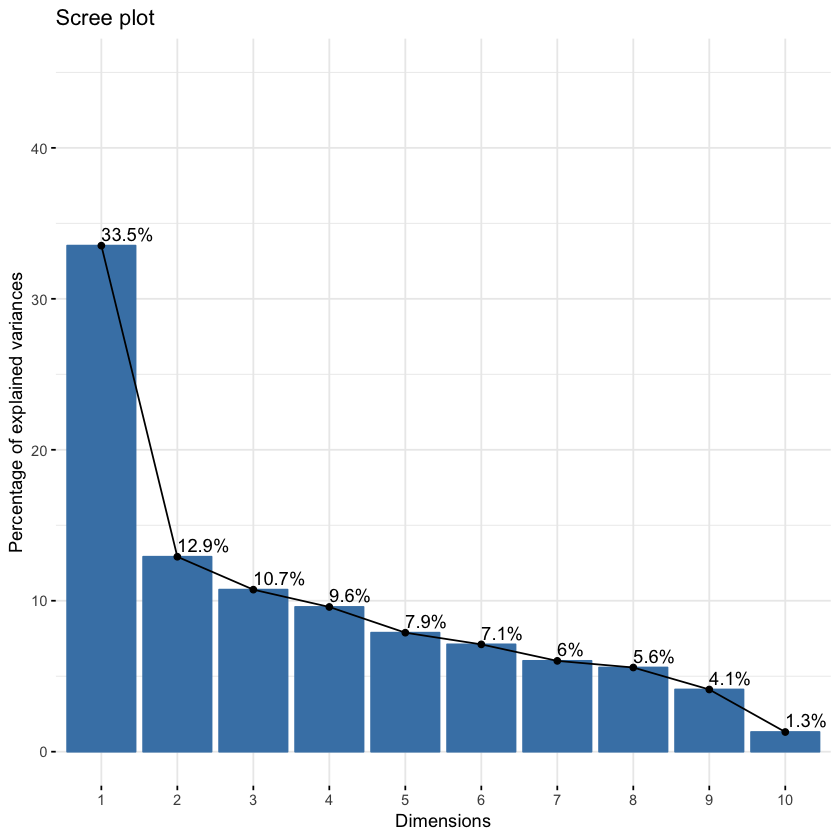

In [45]:
fviz_screeplot(res.mca, addlabels = TRUE, ylim = c(0, 45))

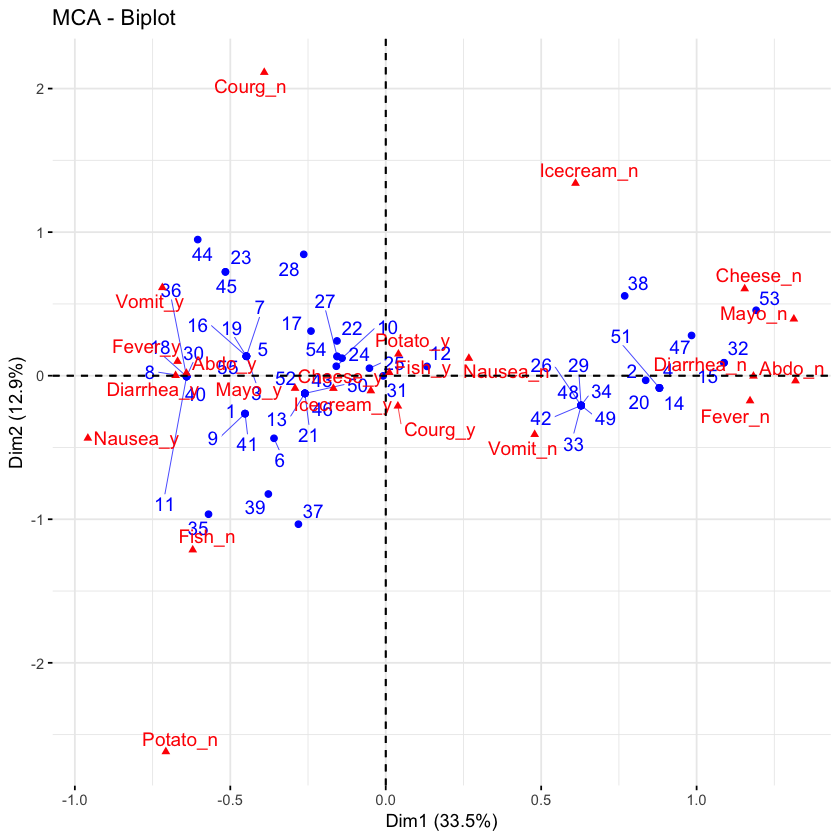

In [16]:
fviz_mca_biplot(res.mca, 
               repel = TRUE, # Avoid text overlapping (slow if many point)
               ggtheme = theme_minimal())

In [17]:
var <- get_mca_var(res.mca)
var

Multiple Correspondence Analysis Results for variables
  Name       Description                  
1 "$coord"   "Coordinates for categories" 
2 "$cos2"    "Cos2 for categories"        
3 "$contrib" "contributions of categories"

### The questions in terms of principal components

In [18]:
head(var$coord,20)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,0.26739087,0.121390290,-0.265583253,0.03376130,0.073704999
Nausea_y,-0.95815062,-0.434981874,0.951673323,-0.12097801,-0.264109581
Vomit_n,0.47902794,-0.409194649,0.084492799,0.27361142,0.052452504
Vomit_y,-0.71854191,0.613791974,-0.126739198,-0.41041713,-0.078678757
Abdo_n,1.31802207,-0.035745005,-0.005094243,-0.15360951,-0.069869870
Abdo_y,-0.64119993,0.017389462,0.002478280,0.07472895,0.033990747
Fever_n,1.17183098,-0.174895110,0.097275290,-0.18967098,-0.018478570
Fever_y,-0.66961770,0.099940063,-0.055585880,0.10838342,0.010559183
Diarrhea_n,1.18282245,-0.002756840,-0.082979839,-0.24123007,-0.104910816
Diarrhea_y,-0.67589854,0.001575337,0.047417051,0.13784575,0.059949038


## Contribution to the principal components

In [20]:
head(var$contrib)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,1.515869,0.81100008,4.670018e+00,0.08449397,0.48977906
Nausea_y,5.431862,2.90608363,1.673423e+01,0.30277007,1.75504164
Vomit_n,3.733667,7.07226253,3.627455e-01,4.25893721,0.19036376
Vomit_y,5.600500,10.60839380,5.441183e-01,6.38840581,0.28554563
Abdo_n,15.417637,0.02943661,7.192511e-04,0.73219636,0.18424268
Abdo_y,7.500472,0.01432051,3.499060e-04,0.35620363,0.08963157


## Correlation between variables and PC

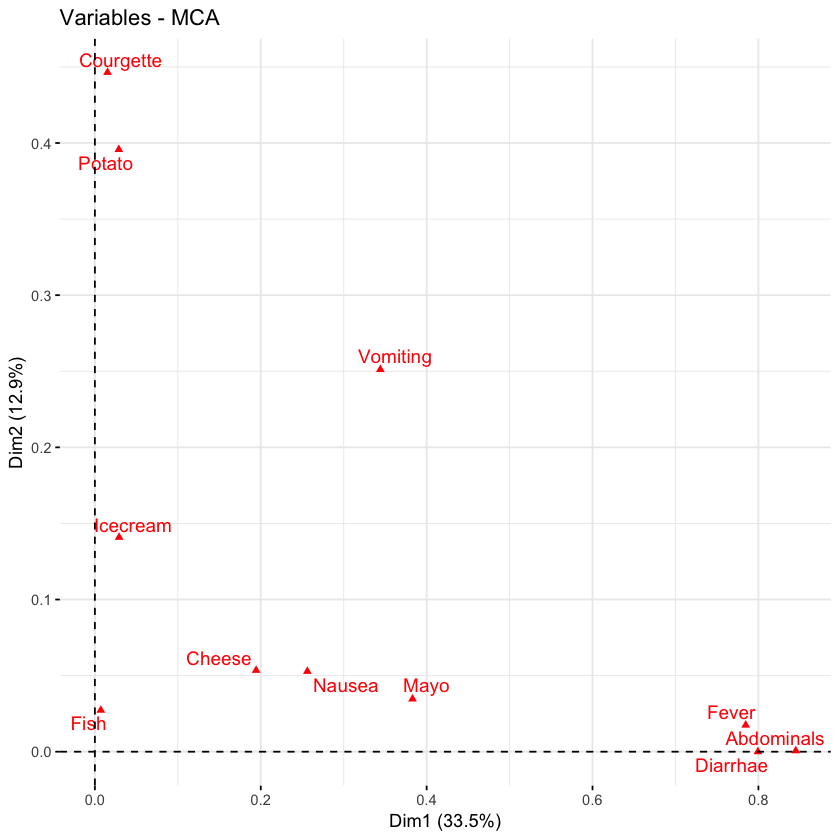

In [22]:
fviz_mca_var(res.mca, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

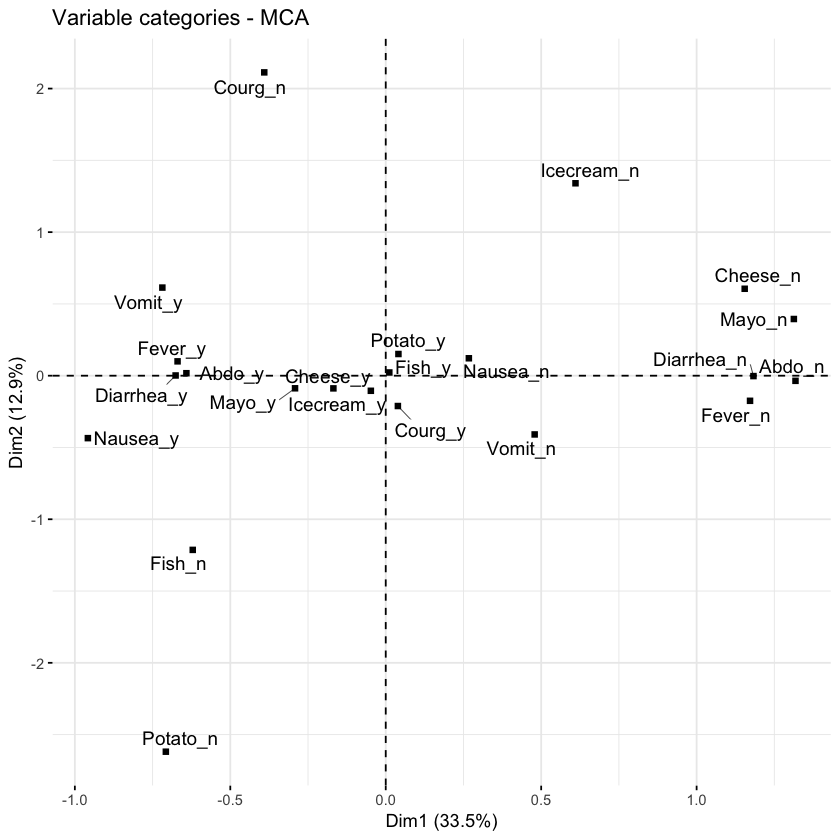

In [31]:
fviz_mca_var(res.mca, col.var="black", shape.var = 15,
             repel = TRUE)

The quality of the representation is called *the squared cosine (cos2)*, which measures the degree of association between variable categories and a particular axis. 

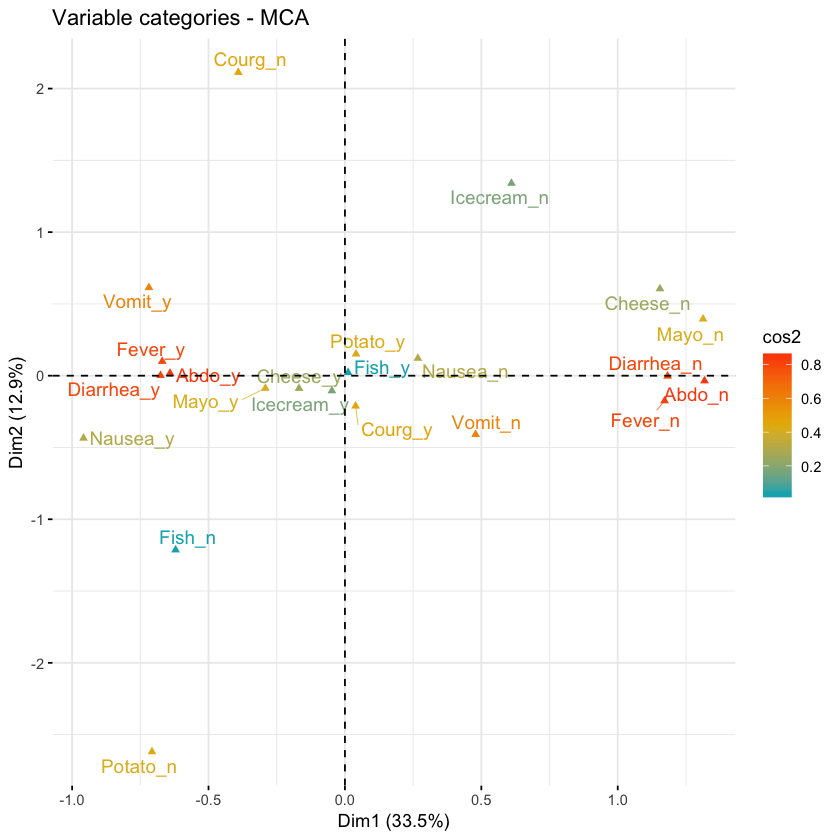

In [24]:
# Color by cos2 values: quality on the factor map
fviz_mca_var(res.mca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # Avoid text overlapping
             ggtheme = theme_minimal())


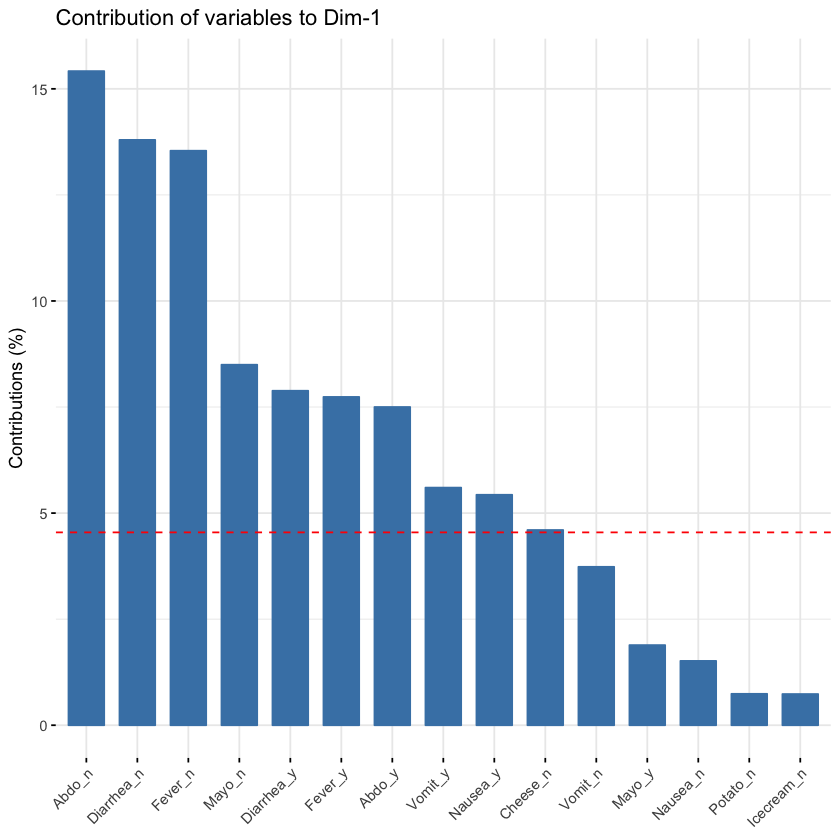

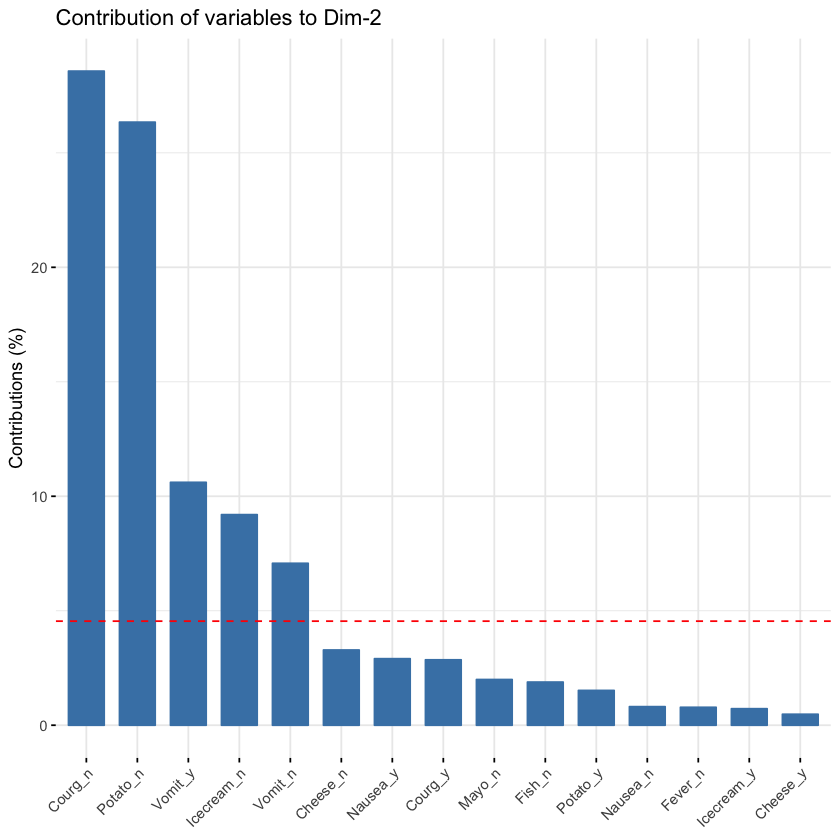

In [25]:
fviz_contrib(res.mca, choice = "var", axes = 1, top = 15)
fviz_contrib(res.mca, choice = "var", axes = 2, top = 15)

# Dashed lines are the expected average value for uniform contribution

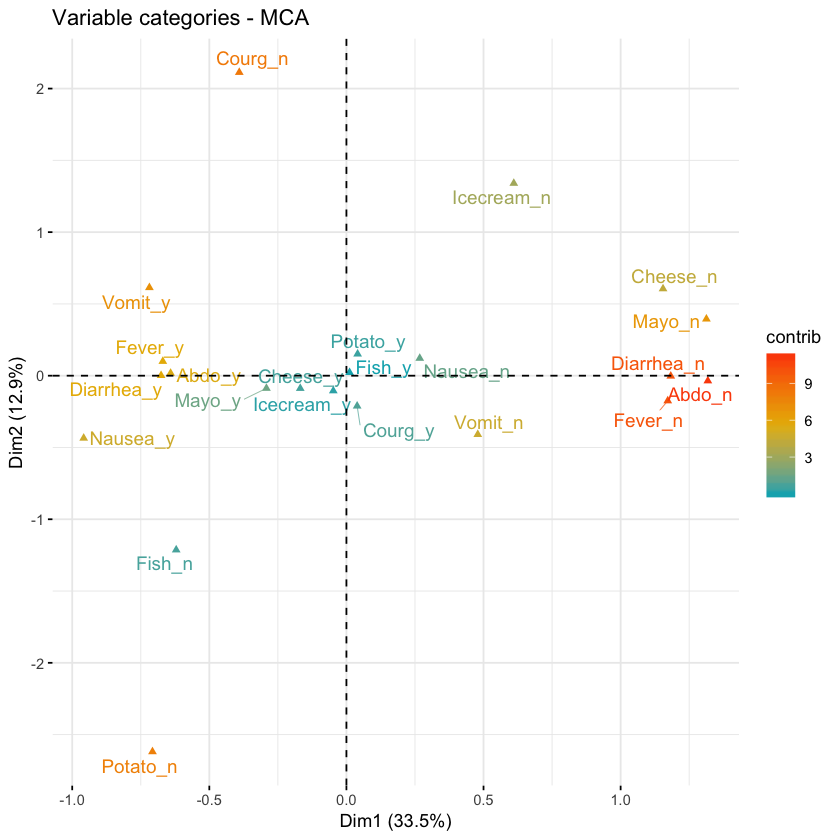

In [26]:
fviz_mca_var(res.mca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # avoid text overlapping (slow)
             ggtheme = theme_minimal()
             )

## Visualization of individuals

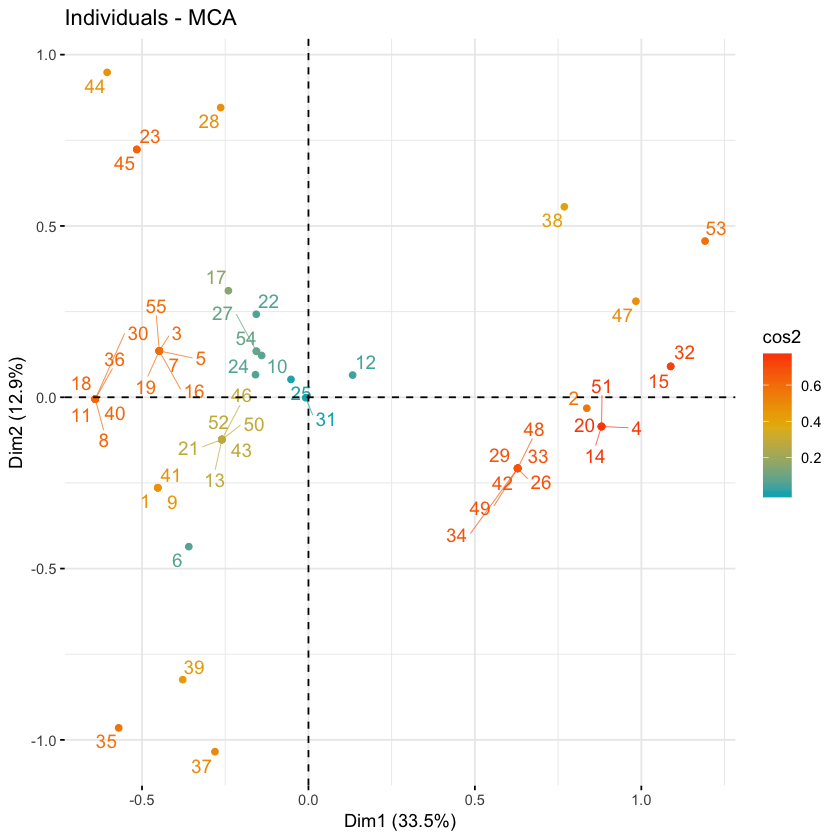

In [27]:
fviz_mca_ind(res.mca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping (slow if many points)
             ggtheme = theme_minimal())

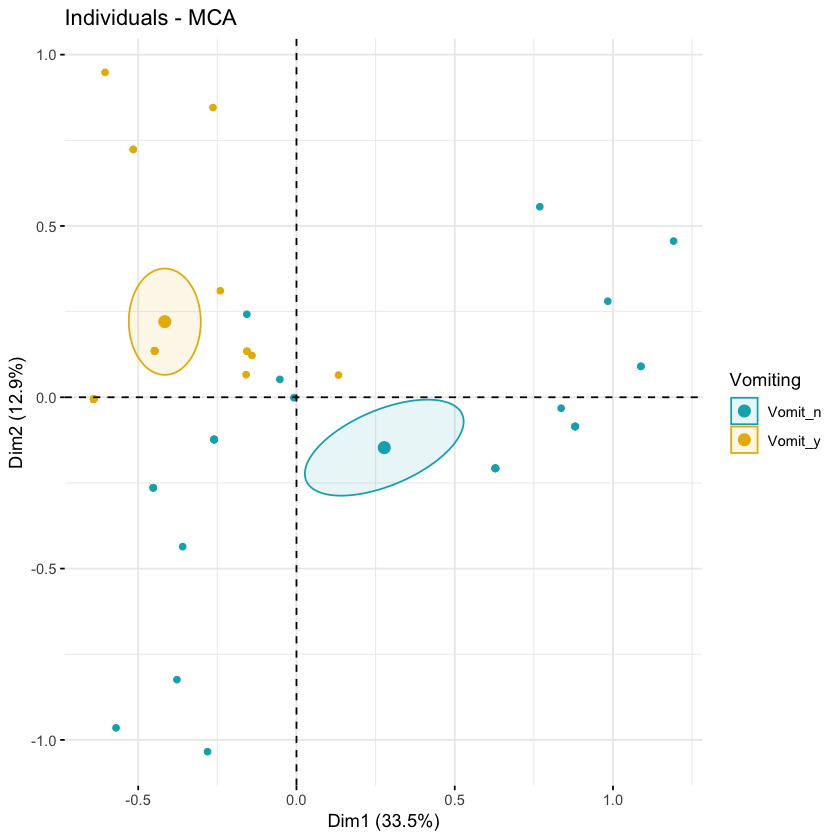

In [38]:
fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "Vomiting", # color by groups 
             palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_minimal()) 

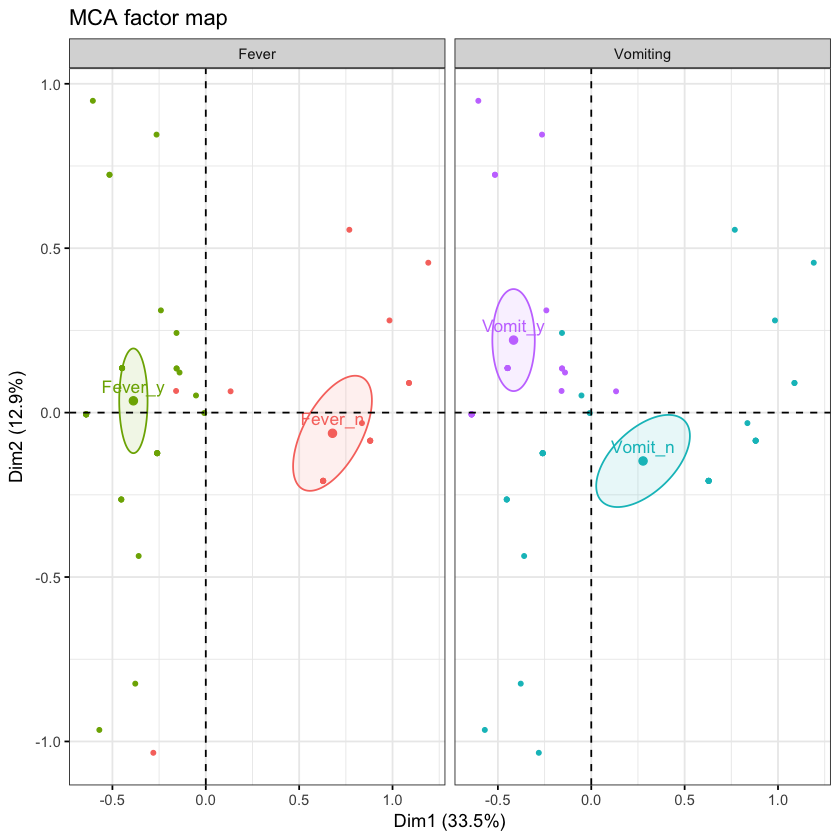

In [39]:
fviz_ellipses(res.mca, c("Vomiting", "Fever"),
              geom = "point")

In [41]:
res.desc <- dimdesc(res.mca, axes = c(1,2))
# Description of dimension 1
res.desc[[1]]

,R2,p.value
Abdominals,0.8451157,4.055640e-23
Diarrhae,0.7994680,3.910776e-20
Fever,0.7846788,2.600566e-19
Mayo,0.3829749,4.756234e-07
Vomiting,0.3442016,2.510738e-06
Nausea,0.2562007,8.062777e-05
Cheese,0.1944181,7.534834e-04
,Estimate,p.value
Abdo_n,0.5671866,4.055640e-23
Diarrhea_n,0.5380920,3.910776e-20


In [42]:
# Description of dimension 2
res.desc[[2]]

,R2,p.value
Courgette,0.4464145,2.500166e-08
Potato,0.3957543,2.690662e-07
Vomiting,0.2511604,9.728027e-05
Icecream,0.1409011,4.743927e-03
,Estimate,p.value
Courg_n,0.4176013,2.500166e-08
Potato_y,0.4977523,2.690662e-07
Vomit_y,0.1838104,9.728027e-05
Icecream_n,0.2597197,4.743927e-03
Icecream_y,-0.2597197,4.743927e-03


## Suplemental variables

In [46]:
res.mca <- MCA(poison,  quanti.sup = 1:2, quali.sup = 3:4,  graph=FALSE)

In [47]:
# Supplementary qualitative variable categories
res.mca$quali.sup
# Supplementary quantitative variables
res.mca$quanti
# Supplementary individuals
res.mca$ind.sup

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Sick_n,1.40983382,-0.05780887,0.03535043,-0.12299072,-0.05644922
Sick_y,-0.63071513,0.02586186,-0.01581467,0.05502217,0.02525360
F,0.02736360,0.11839736,0.08920658,-0.03662471,-0.03965681
M,-0.02837707,-0.12278244,-0.09251053,0.03798119,0.04112558
,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Sick_n,0.8892035226,0.001495045,0.0005590553,0.006767216,0.001425546
Sick_y,0.8892035226,0.001495045,0.0005590553,0.006767216,0.001425546
F,0.0007764989,0.014537117,0.0082525484,0.001391050,0.001630909
M,0.0007764989,0.014537117,0.0082525484,0.001391050,0.001630909
,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Age,-0.01198562,-0.02141403,-0.25866390,0.20587533,0.01725215
Time,-0.84214754,-0.03894016,-0.05226732,-0.04636355,0.02743571


NULL

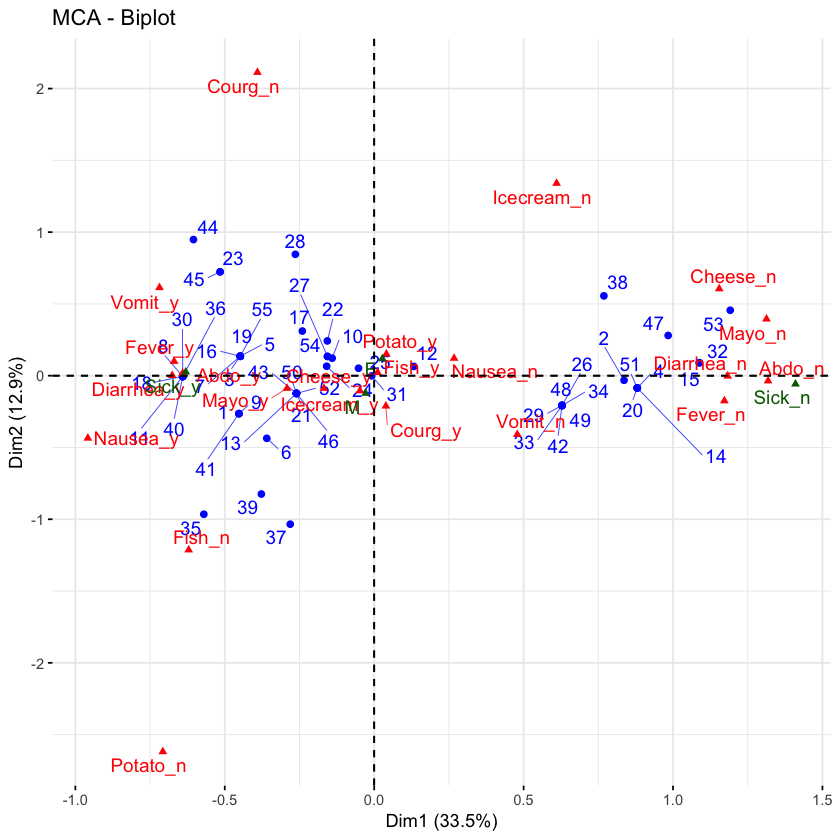

In [48]:
fviz_mca_biplot(res.mca, repel = TRUE,
                ggtheme = theme_minimal())

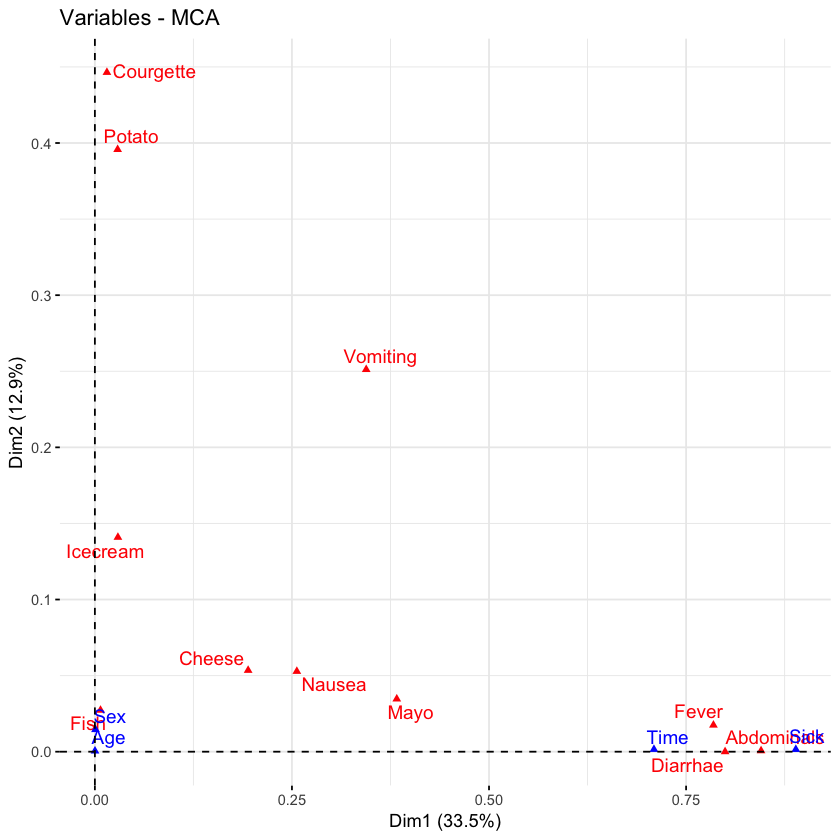

In [49]:
fviz_mca_var(res.mca, choice = "mca.cor",
             repel = TRUE)

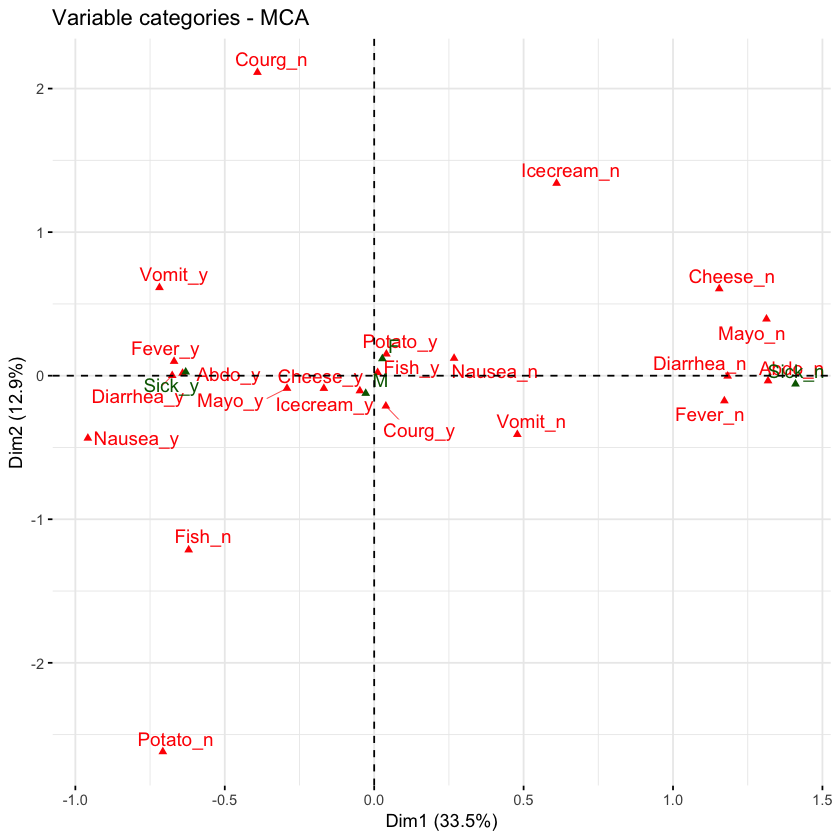

In [50]:
fviz_mca_var(res.mca, repel = TRUE,
             ggtheme= theme_minimal())

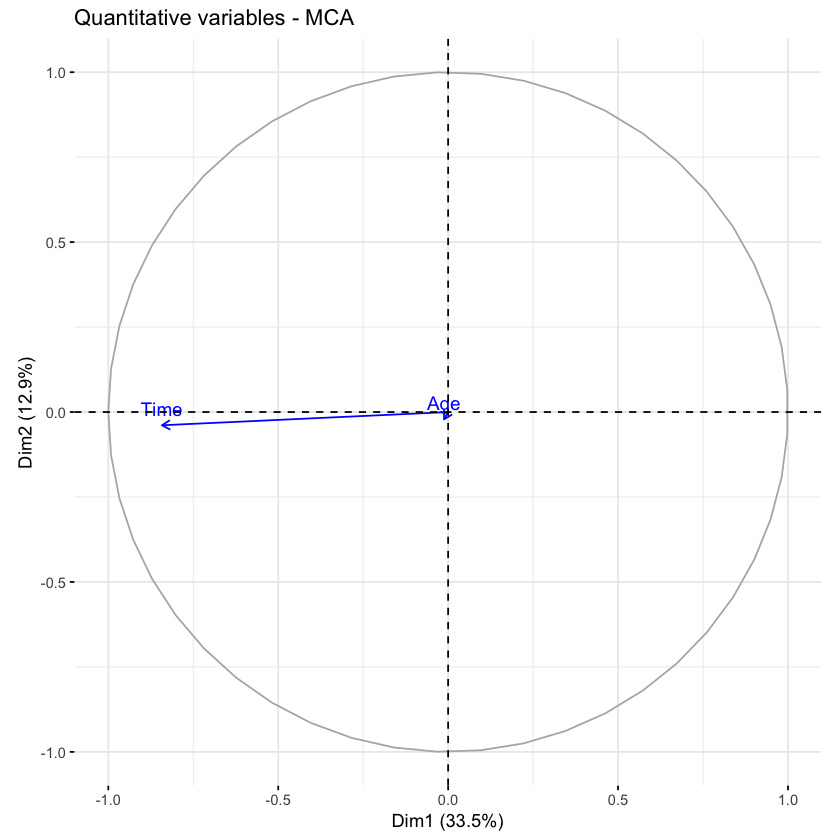

In [51]:
fviz_mca_var(res.mca, choice = "quanti.sup",
             ggtheme = theme_minimal())

## It's ok: I didn't take any individual as supplemental

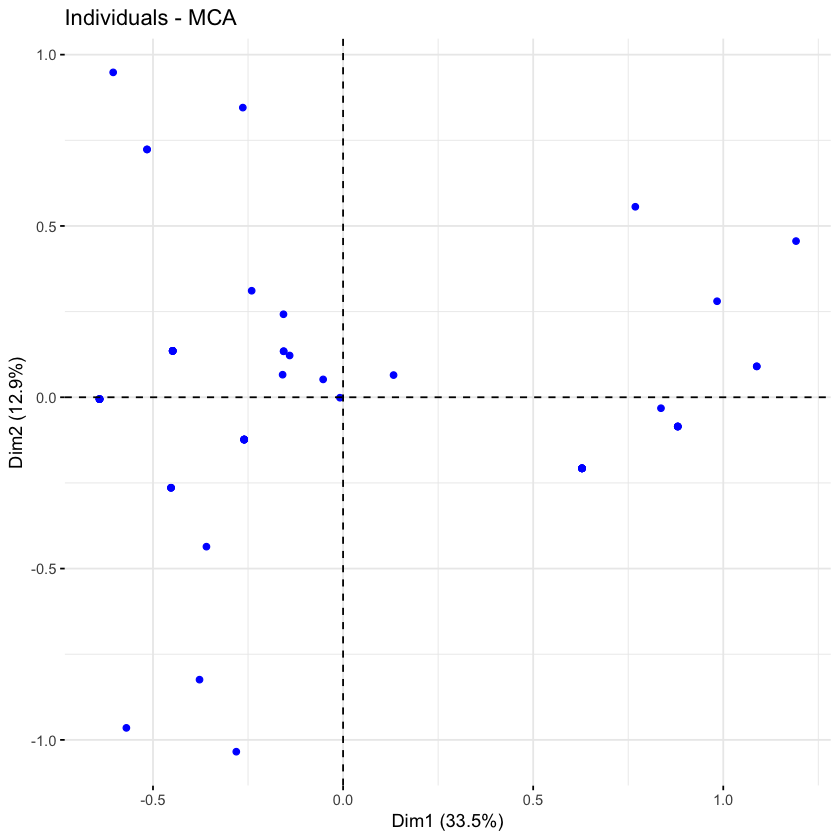

In [52]:
fviz_mca_ind(res.mca, 
             label = "ind.sup", #Show the label of ind.sup only
             ggtheme = theme_minimal())

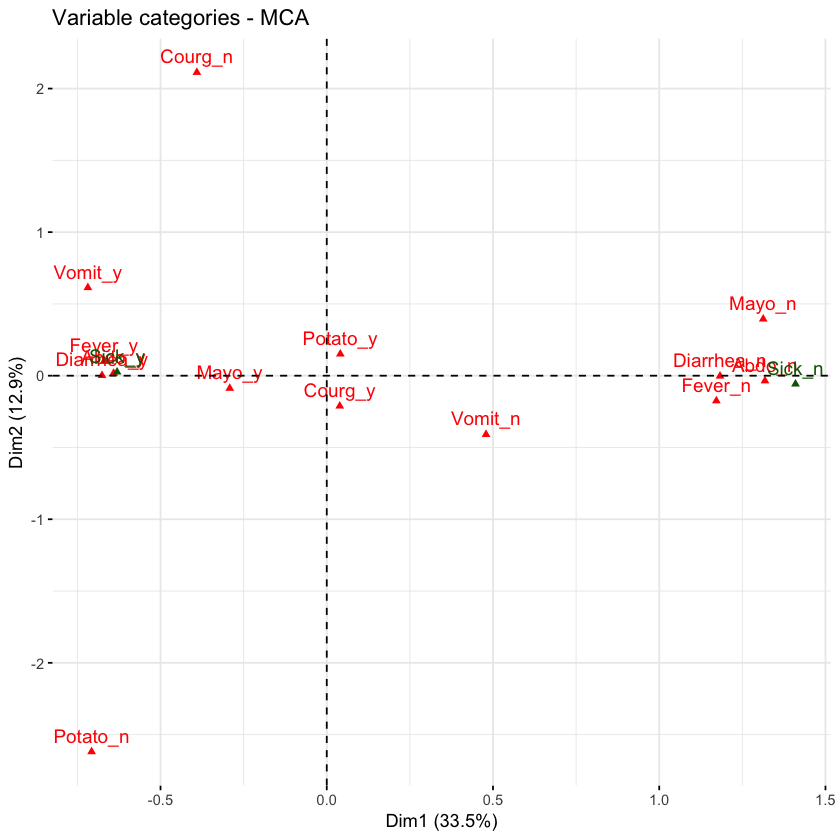

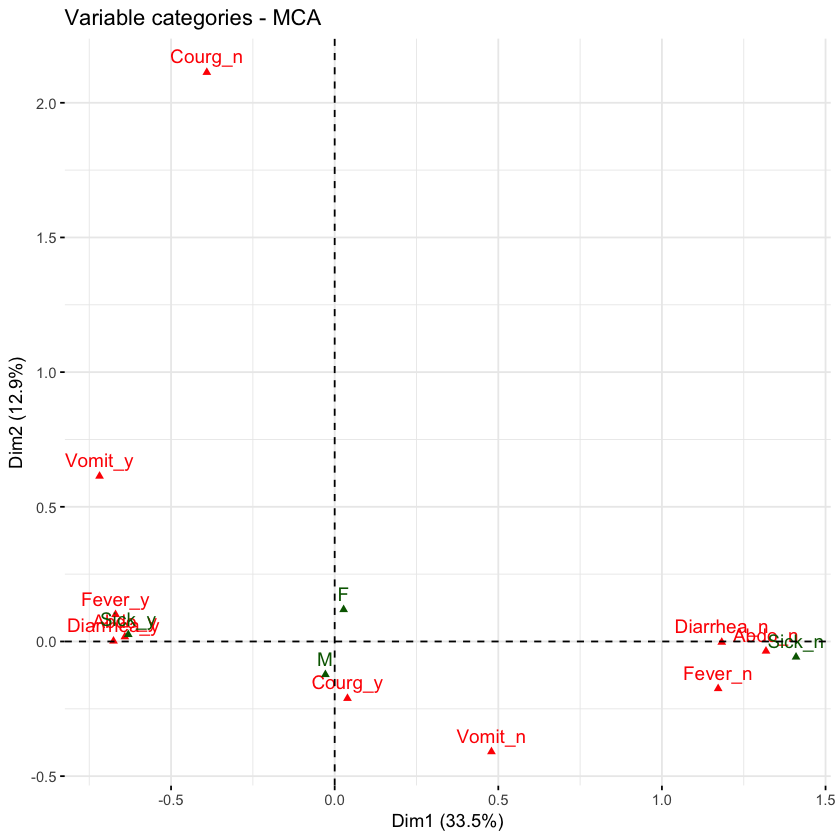

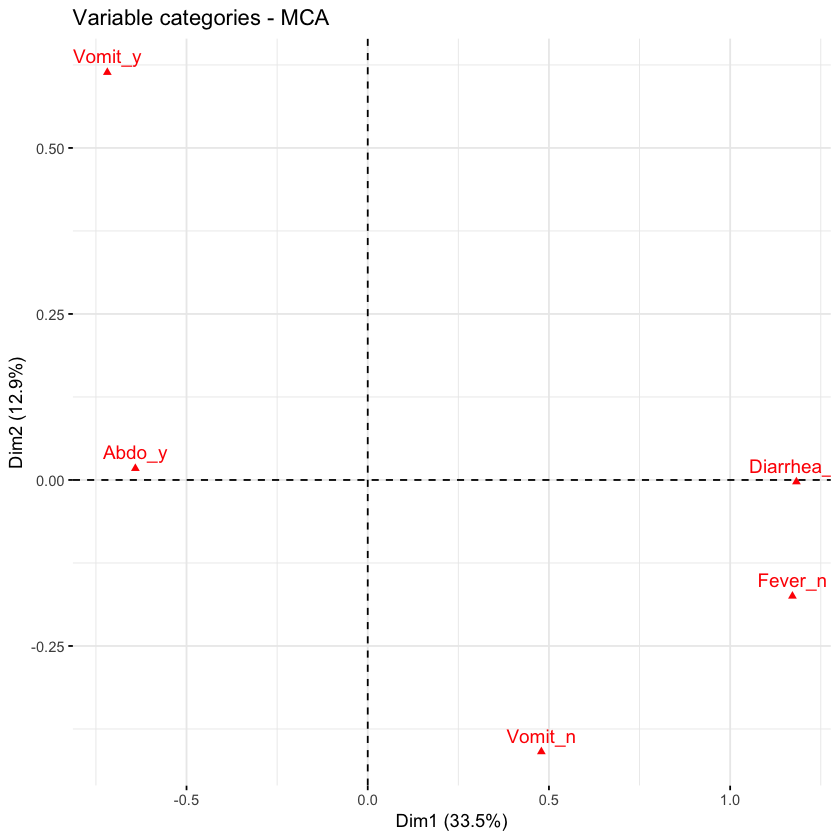

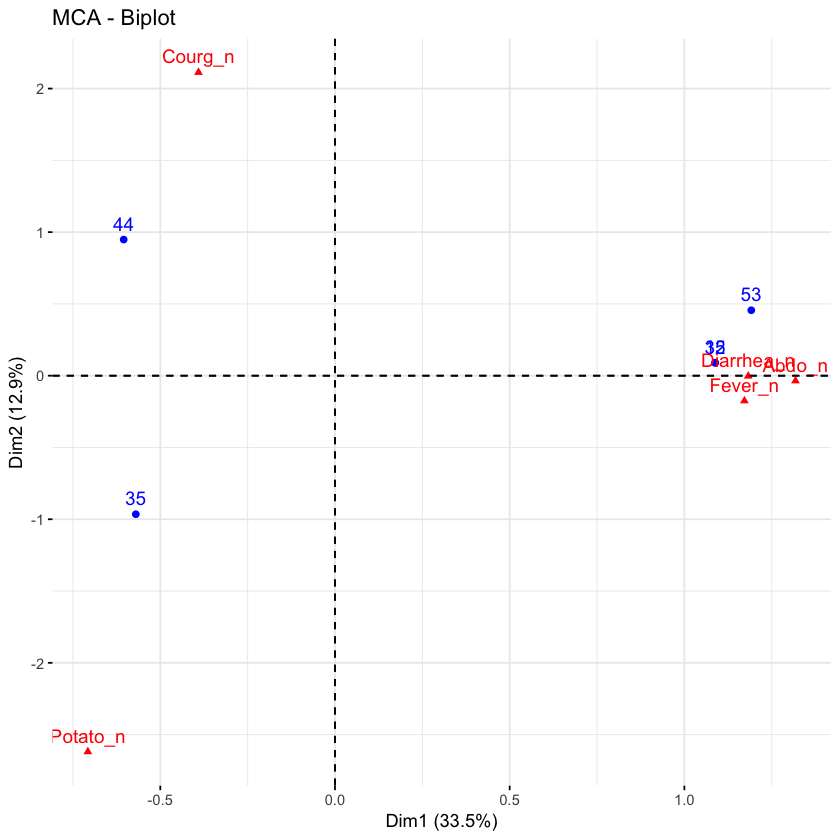

In [53]:
# Visualize variable categories with cos2 >= 0.4
fviz_mca_var(res.mca, select.var = list(cos2 = 0.4))
# Top 10 active variables with the highest cos2
fviz_mca_var(res.mca, select.var= list(cos2 = 10))
# Select by names
name <- list(name = c("Fever_n", "Abdo_y", "Diarrhea_n",
                      "Fever_Y", "Vomit_y", "Vomit_n"))
fviz_mca_var(res.mca, select.var = name)
# top 5 contributing individuals and variable categories
fviz_mca_biplot(res.mca, select.ind = list(contrib = 5), 
               select.var = list(contrib = 5),
               ggtheme = theme_minimal())

In [54]:
library("ade4")
res.mca <- dudi.acm(poison.active, scannf = FALSE, nf = 5)


Attaching package: ‘ade4’

The following object is masked from ‘package:FactoMineR’:

    reconst



In [56]:
install.packages("ExPosition")

also installing the dependency ‘prettyGraphs’




The downloaded binary packages are in
	/var/folders/05/nyrh4fgd37j0cwv9czt39c700000gn/T//RtmpnxLfF0/downloaded_packages


In [57]:
library("ExPosition")
res.mca <- epMCA(poison.active, graph = FALSE, correction = "bg")

Loading required package: prettyGraphs


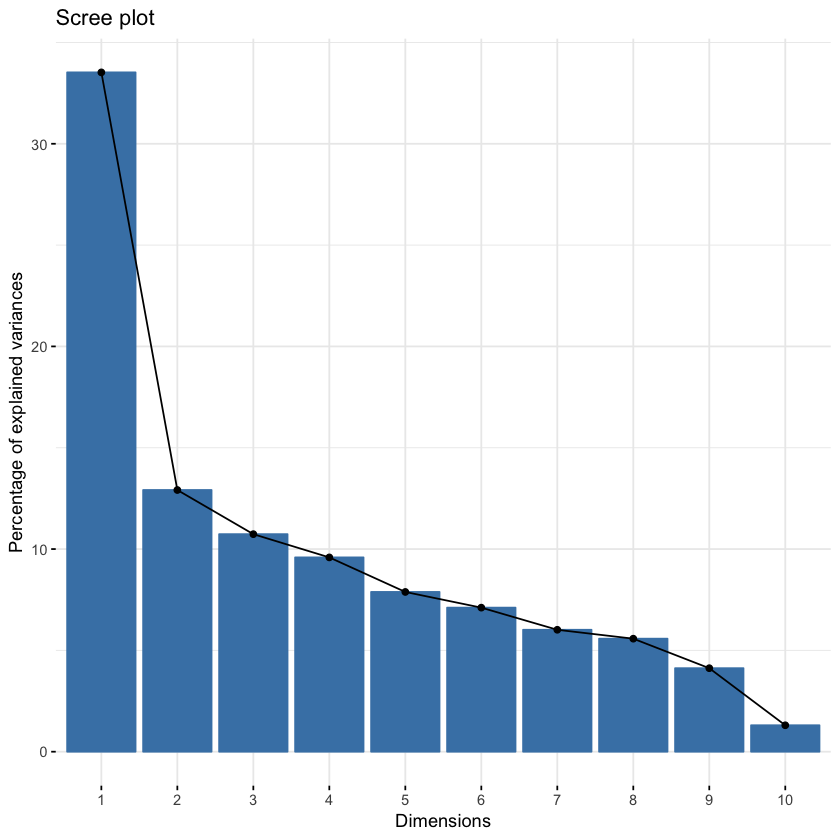

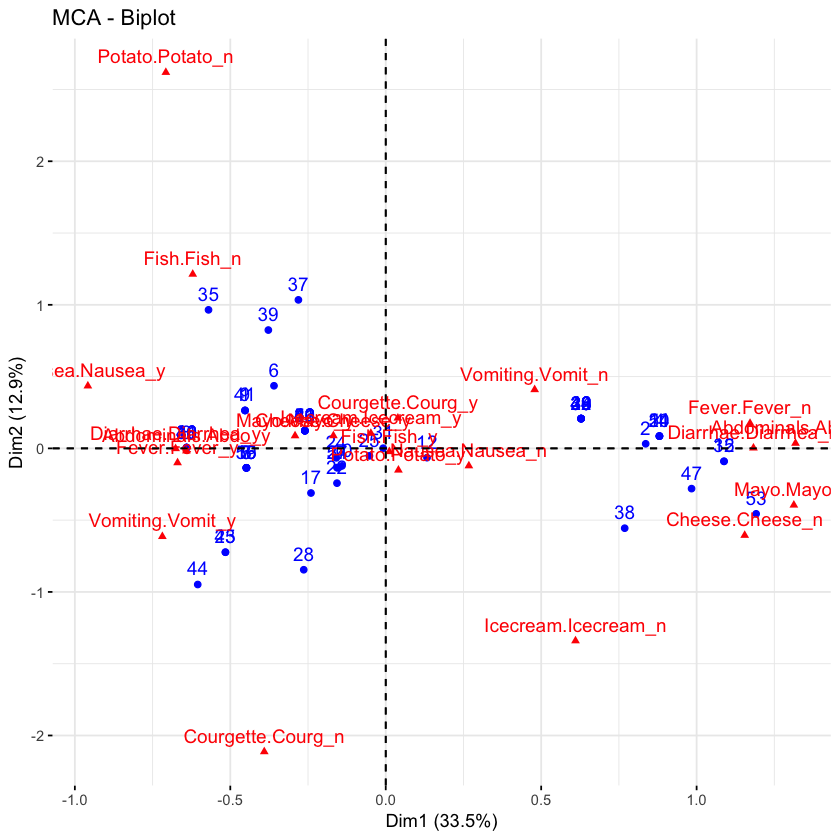

In [58]:
fviz_eig(res.mca)     # Scree plot
fviz_mca_biplot(res.mca) # Biplot of rows and columns